## Dispersion relation

$\omega^3 - \omega^2  \omega^n_{*e} - \omega \omega^2_s(1 + \frac{\gamma}{\tau}) + \omega^2_s(\omega^T_{*i} + \frac{\gamma-1} {\tau}\omega^n_{*e}) = 0$

Assume that $\gamma \sim 1$

$\Rightarrow \omega^3 - \omega^2  \omega^n_{*e} - 2\omega  \omega^2_s + \omega^2_s \omega^T_{*i} = 0$

In [2]:
# symbolic solution

import sympy as sym

                                                              
omega_ne, omega_ti, omega_s = sym.symbols('\omega_{ne}, \omega_{Ti}, \omega_s')
omega = sym.Symbol('omega')

expression = omega**3 - omega**2 *omega_ne - 2*omega*omega_s + omega_s**2 *omega_ti

solution = sym.solve(expression, omega)

In [4]:
solution[0]

\omega_{ne}/3 - (6*\omega_s + \omega_{ne}**2)/(3*(27*\omega_s**2*\omega_{Ti}/2 - 9*\omega_s*\omega_{ne} - \omega_{ne}**3 + sqrt(-4*(6*\omega_s + \omega_{ne}**2)**3 + (27*\omega_s**2*\omega_{Ti} - 18*\omega_s*\omega_{ne} - 2*\omega_{ne}**3)**2)/2)**(1/3)) - (27*\omega_s**2*\omega_{Ti}/2 - 9*\omega_s*\omega_{ne} - \omega_{ne}**3 + sqrt(-4*(6*\omega_s + \omega_{ne}**2)**3 + (27*\omega_s**2*\omega_{Ti} - 18*\omega_s*\omega_{ne} - 2*\omega_{ne}**3)**2)/2)**(1/3)/3

In [5]:
solution[1]

\omega_{ne}/3 - (6*\omega_s + \omega_{ne}**2)/(3*(-1/2 - sqrt(3)*I/2)*(27*\omega_s**2*\omega_{Ti}/2 - 9*\omega_s*\omega_{ne} - \omega_{ne}**3 + sqrt(-4*(6*\omega_s + \omega_{ne}**2)**3 + (27*\omega_s**2*\omega_{Ti} - 18*\omega_s*\omega_{ne} - 2*\omega_{ne}**3)**2)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27*\omega_s**2*\omega_{Ti}/2 - 9*\omega_s*\omega_{ne} - \omega_{ne}**3 + sqrt(-4*(6*\omega_s + \omega_{ne}**2)**3 + (27*\omega_s**2*\omega_{Ti} - 18*\omega_s*\omega_{ne} - 2*\omega_{ne}**3)**2)/2)**(1/3)/3

In [10]:
solution[2]

\omega_{ne}/3 - (6*\omega_s + \omega_{ne}**2)/(3*(-1/2 + sqrt(3)*I/2)*(27*\omega_s**2*\omega_{Ti}/2 - 9*\omega_s*\omega_{ne} - \omega_{ne}**3 + sqrt(-4*(6*\omega_s + \omega_{ne}**2)**3 + (27*\omega_s**2*\omega_{Ti} - 18*\omega_s*\omega_{ne} - 2*\omega_{ne}**3)**2)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(27*\omega_s**2*\omega_{Ti}/2 - 9*\omega_s*\omega_{ne} - \omega_{ne}**3 + sqrt(-4*(6*\omega_s + \omega_{ne}**2)**3 + (27*\omega_s**2*\omega_{Ti} - 18*\omega_s*\omega_{ne} - 2*\omega_{ne}**3)**2)/2)**(1/3)/3

### Normalised dispersion relation

$\hat{\omega^3} + \hat{\omega^2}(k_y \lambda_i)\left(\frac{L_n}{\lambda_i}\right)^{-1}-2\hat{\omega}(k_z \lambda_i)^2+(k_z \lambda_i)^2 (k_y \lambda_i) \left(\frac{L_T}{\lambda_i}\right)^{-1} \left(\frac{T_e}{T_i}\right)^{-1}=0 $


- $\hat{\omega}=\frac{\omega}{\Omega_i}$
- $T_e/T_i = 10$
- $k_y \lambda_i = 0.1$
- $L_n / \lambda_i = 10^5$
- $L_T / \lambda_i = 10$

In [1]:
# define a function that calculates the dispersion relation
# a function that needs the "guesses" for omega (x) and the k_z*lambda_i
def expression(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters values
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    
    # calculate dispersion relation
    expression = x**3 + x**2 *k_y_lambda*(L_n_lambda)**(-1)- 2*x*(k_z_lambda)**2 + (k_z_lambda)**2 *k_y_lambda*(L_T_lambda)**(-1)*temp_ratio**(-1)
    
    return expression  # return the dispersion relation

In [3]:
# find solution for one point
from scipy import optimize

k_z_lambda = 0.001

solution = optimize.root_scalar(expression, x0 = -0.001+0.01j, x1 = 0.001+0.01j, args=k_z_lambda, method='secant')

solution.root

(0.0006184822877442405-1.1466441256357198e-15j)

In [15]:
# solve the equation and get all the roots
# import packages
import numpy as np
from scipy import optimize

# define values for k_z * lambda_i
k_z_lambda = np.linspace(0.00001, 0.01, 1000)

omega_1_numerical = [] # list to keep one root
omega_2_numerical = [] # list to keep second root

for i in k_z_lambda:
    # calculate first root
    solution_1 = optimize.root_scalar(expression, x0 = -0.001+0.01j,    
                        x1 = 0.001+0.01j, args=i, method='secant')
    
    # save first root
    omega_1_numerical.append(solution_1.root)
    
    # calculate second root
    solution_2 = optimize.root_scalar(expression, x0 = -0.001-0.01j, 
                        x1 = 0.001-0.01j, args=i, method='secant')
    
    # save second root
    omega_2_numerical.append(solution_2.root)# import packages
    

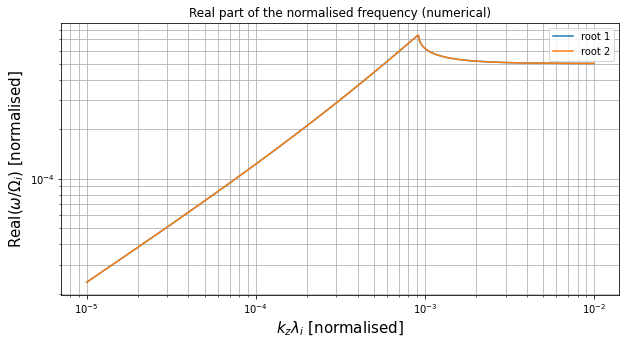

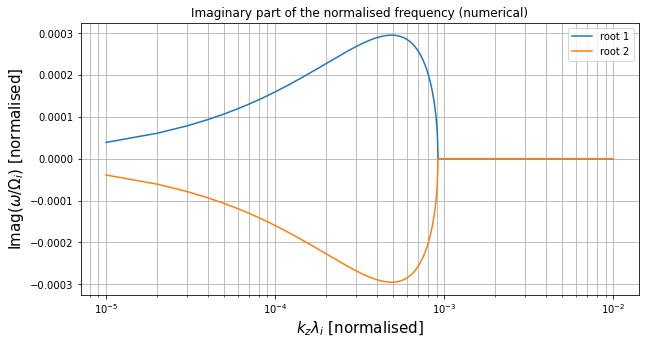

In [11]:
# plot the omega
import matplotlib.pyplot as plt

# turn the lists into numpy arrays
omega_1_numerical = np.asarray(omega_1_numerical)
omega_2_numerical = np.asarray(omega_2_numerical)
# plot frequency

plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda, omega_1_numerical.real, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.real, label='root 2') # plot root 2

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part for both roots

plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_1_numerical.imag, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.imag, label='root 2') # plot root 2


plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

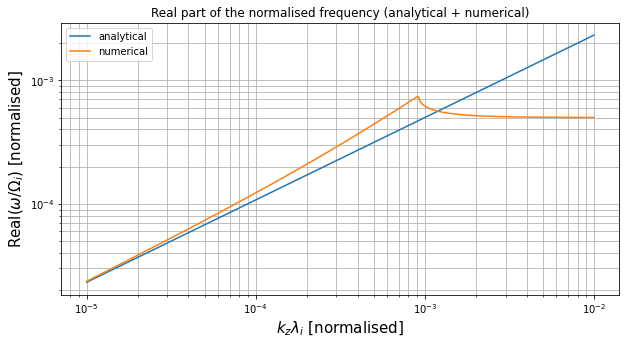

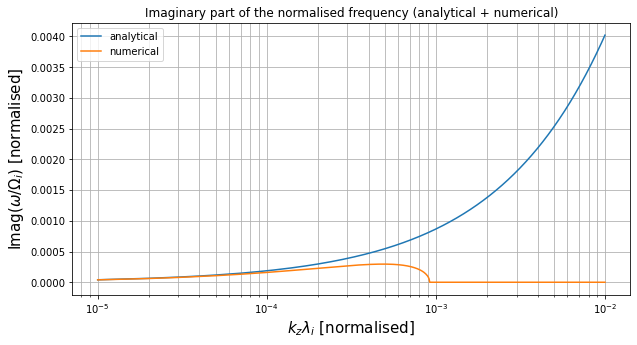

In [12]:
# normalised solution for the ITG
# plots real part and imaginary part of frequency 
# for both analytical and numerical solution

# set parameters for the analytical solution
k_y_lambda = 0.1 # k_y * lambda_i
L_T_lambda = 10 # L_T / lambda_i 
k_z_lambda = np.linspace(0.00001, 0.01, 1000) # k_z * lambda_i
temp_ratio = 10

# calculate omega (analytical)
omega_analytical = (1/2 - np.sqrt(3)/2j)*np.absolute(k_y_lambda**(1/3) * 
                                          L_T_lambda**(-1/3) * 
                                          temp_ratio**(-1/3) * 
                                          (k_z_lambda)**(2/3))


# plot frequency
plt.subplots(figsize=(10,5))

# plot real part - both analytical and numerical
plt.plot(k_z_lambda, omega_analytical.real, label='analytical')
plt.plot(k_z_lambda, omega_1_numerical.real, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (analytical + numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part - both analytical and numerical
plt.subplots(figsize=(10,5))
plt.plot(k_z_lambda, omega_analytical.imag, label='analytical')
plt.plot(k_z_lambda, omega_1_numerical.imag, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (analytical + numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

### Normalised dispersion relation (more complex solution)

$\hat{\omega^3} + \hat{\omega^2}(k_y \lambda_i)\left(\frac{L_n}{\lambda_i}\right)^{-1}-\frac{7}{6}\hat{\omega}(k_z \lambda_i)^2+(k_z \lambda_i)^2 (k_y \lambda_i) \left(\frac{L_T}{\lambda_i}\right)^{-1} \left(\frac{T_e}{T_i}\right)^{-1}-\frac{1}{15}(k_z \lambda_i)^2 (k_y \lambda_i)\left(\frac{L_n}{\lambda_i}\right)^{-1}=0 $


- $\hat{\omega}=\frac{\omega}{\Omega_i}$
- $T_e/T_i = 10$
- $k_y \lambda_i = 0.1$
- $L_n / \lambda_i = 10^5$
- $L_T / \lambda_i = 10$

In [63]:
# more complex expression

# define a function for the dispersion relation
def dispersion_relation(x, k_z_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    
    # return the expression for the dispersion relation
    return x**3 + x**2 *k_y_lambda*(L_n_lambda)**(-1) - (7/6)*x*(k_z_lambda)**2 + (k_z_lambda)**2 *k_y_lambda*(L_T_lambda)**(-1)*temp_ratio**(-1) - (1/15)*(k_z_lambda)**2 *(k_y_lambda)*(L_n_lambda)**(-1)
    

In [42]:
omega_1_numerical = [] # list for the first root
omega_2_numerical = [] # list for the second root

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5,-2,1000)

for i in k_z_lambda:
    
    # calculate first root
    solution_1 = optimize.root_scalar(dispersion_relation, x0 = -0.00-0.01j, 
                                      x1 = 0.001-0.01j, args=i, method='secant')
    # save first root
    omega_1_numerical.append(solution_1.root)
    
    # calculate second root
    solution_2 = optimize.root_scalar(dispersion_relation, x0 = -0.00+0.01j, 
                                      x1 = 0.001+0.01j, args=i, method='secant')
   # save second root
    omega_2_numerical.append(solution_2.root)


C:\Users\xrist\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


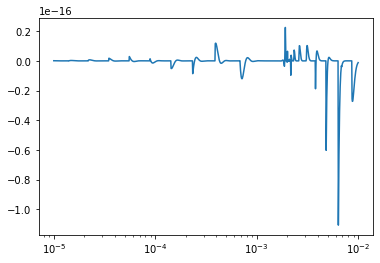

In [44]:
# check the result of the dispersion relation (should return only zeros!)
omega_1_numerical = np.asarray(omega_1_numerical)
omega_2_numerical = np.asarray(omega_2_numerical) 
zeros = dispersion_relation(omega_2_numerical, k_z_lambda)

#print(dispersion_relation(omega_1_numerical, k_z_lambda))

plt.plot(k_z_lambda, zeros)
plt.xscale('log')

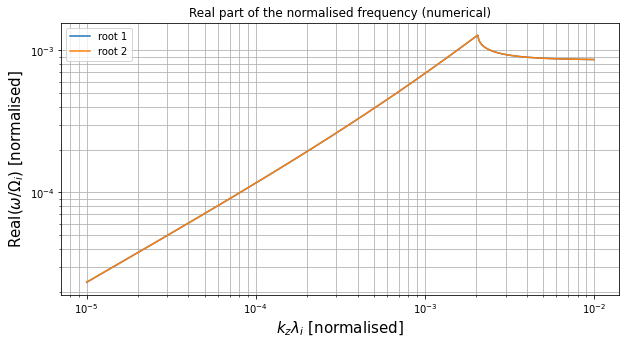

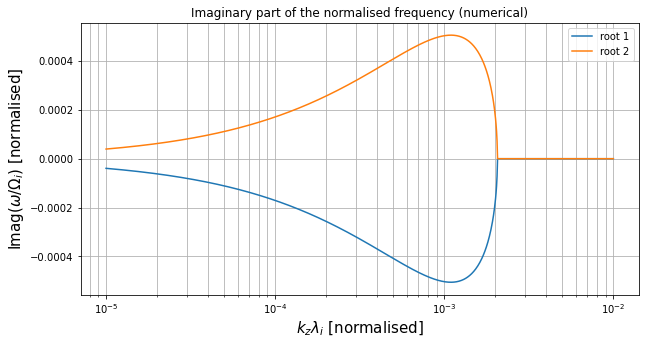

In [36]:
omega_1_numerical = np.asarray(omega_1_numerical)
omega_2_numerical = np.asarray(omega_2_numerical)
# plot frequency

plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda, omega_1_numerical.real, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.real, label='root 2') # plot root 2

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part for both roots

plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_1_numerical.imag, label='root 1') # plot root 1
plt.plot(k_z_lambda, omega_2_numerical.imag, label='root 2') # plot root 2


plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

In [5]:
import numpy as np
from scipy import optimize

k_z_lambda = np.logspace(-5, -2, 1000)

omega_numerical = []

# predict in the first interval
for i in k_z_lambda[:250]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                    x1 = 0.001+0.001j, args=i, method='secant')
    omega_numerical.append(solution.root)

# predict in the second interval
for i in k_z_lambda[250:500]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                    x1 = 0.001+0.002j, args=i, method='secant')
    omega_numerical.append(solution.root)

# predict in the third interval
for i in k_z_lambda[500:750]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.002j, 
                                    x1 = 0.001-0.0001j, args=i, method='secant')
    omega_numerical.append(solution.root)    

# predict in the fourth interval
for i in k_z_lambda[750:1000]:
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.001+0.002j, 
                                    x1 = 0.002-0.0001j, args=i, method='secant')
    omega_numerical.append(solution.root)    
    
print(len(omega_numerical))

1000


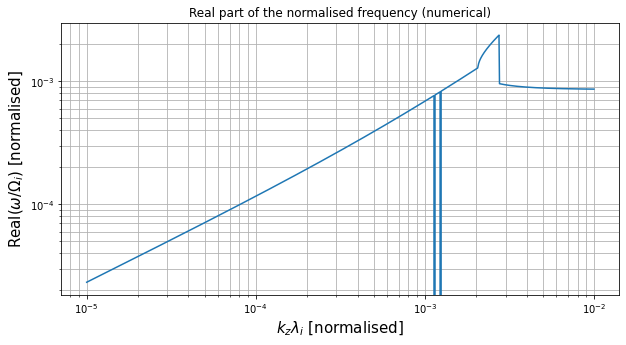

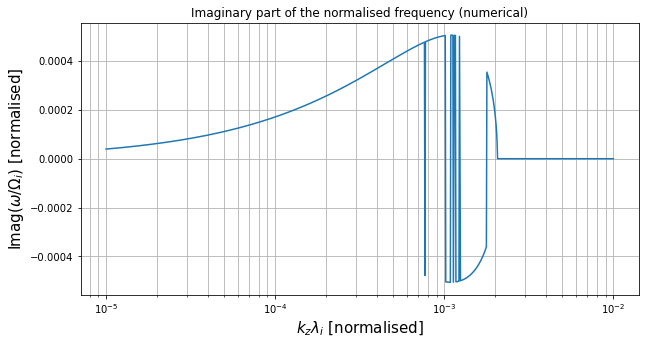

In [6]:
import matplotlib.pyplot as plt
import numpy as np

omega_numerical = np.asarray(omega_numerical)

# plot frequency

plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots

plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda, omega_numerical.imag)


plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

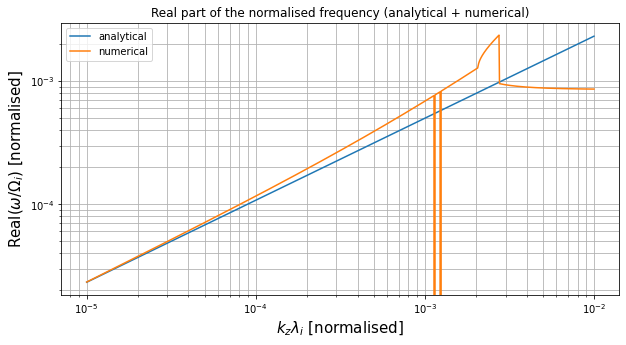

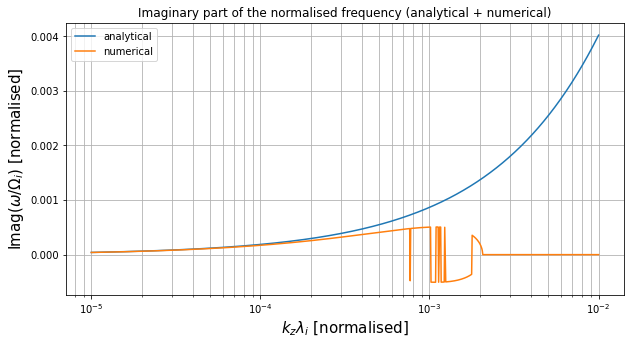

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# normalised solution for the ITG
# plots real part and imaginary part of frequency

# set parameters
k_y_lambda = 0.1 # k_y * lambda_i
L_T_lambda = 10 # L_T / lambda_i 
k_z_lambda = np.logspace(-5, -2, 1000) # k_z * lambda_i
temp_ratio = 10

# calculate omega
omega_analytical = (1/2 - np.sqrt(3)/2j)*np.absolute(k_y_lambda**(1/3) * 
                                          L_T_lambda**(-1/3) * 
                                          temp_ratio**(-1/3) * 
                                          (k_z_lambda)**(2/3))


# plot frequency
plt.subplots(figsize=(10,5))

# plot real part
plt.plot(k_z_lambda, omega_analytical.real, label='analytical')
plt.plot(k_z_lambda, omega_numerical.real, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (analytical + numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part
plt.subplots(figsize=(10,5))
plt.plot(k_z_lambda, omega_analytical.imag, label='analytical')
plt.plot(k_z_lambda, omega_numerical.imag, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (analytical + numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()


In [13]:
import numpy as np
from scipy import optimize

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)

C:\Users\xrist\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


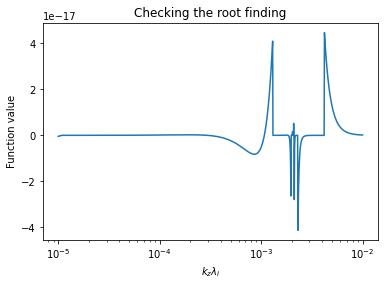

In [14]:
# turn it back to numpy array
omega_numerical = np.asarray(omega_numerical)

# calculate the function's value
function_value = dispersion_relation(omega_numerical, k_z_lambda)

plt.plot(k_z_lambda, function_value)
plt.xlabel('$k_z \lambda_i$')
plt.ylabel('Function value')
plt.title('Checking the root finding')
plt.xscale('log')
plt.show()

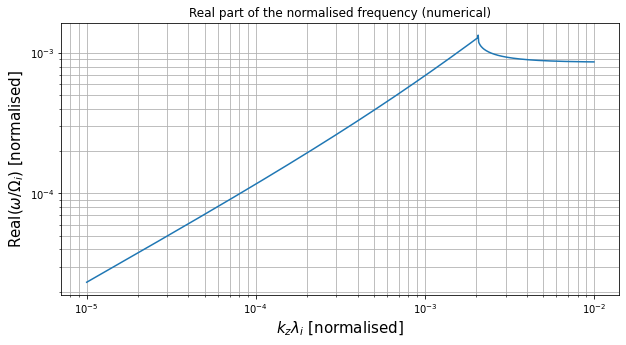

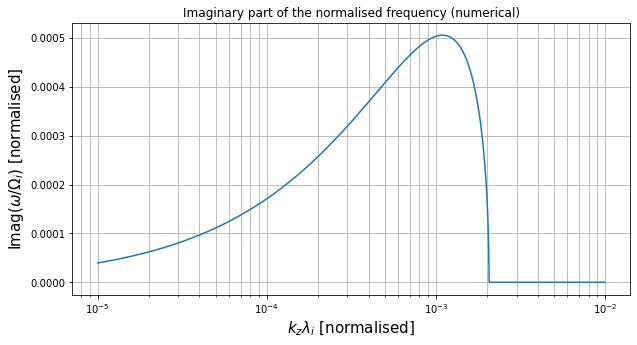

In [68]:
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

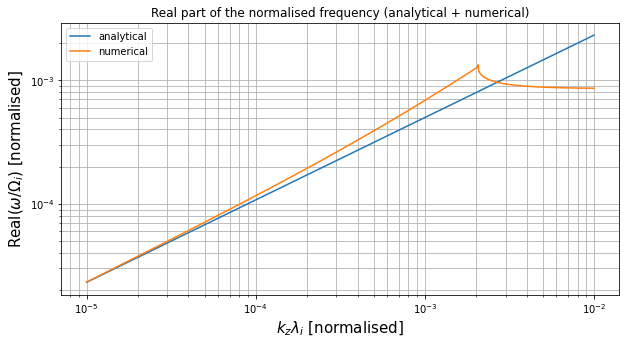

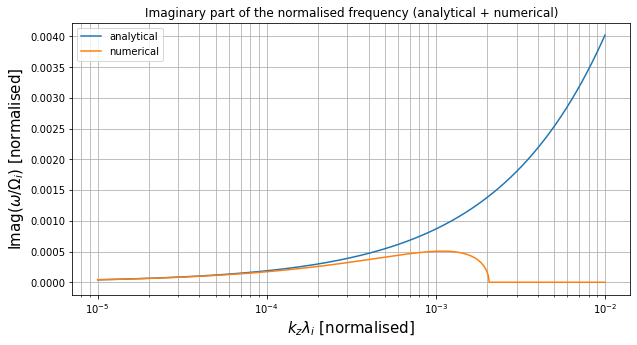

In [69]:
# normalised solution for the ITG
# plots real part and imaginary part of frequency 
# for both analytical and numerical solution

# set parameters
k_y_lambda = 0.1 # k_y * lambda_i
L_T_lambda = 10 # L_T / lambda_i 
k_z_lambda = np.logspace(-5, -2, 1000) # k_z * lambda_i
temp_ratio = 10

# calculate omega analytical
omega_analytical = (1/2 - np.sqrt(3)/2j)*np.absolute(k_y_lambda**(1/3) * 
                                          L_T_lambda**(-1/3) * 
                                          temp_ratio**(-1/3) * 
                                          (k_z_lambda)**(2/3))


# plot frequency
plt.subplots(figsize=(10,5))

# plot real part - both analytical and numerical
plt.plot(k_z_lambda_list, omega_analytical.real, label='analytical')
plt.plot(k_z_lambda_list, omega_numerical.real, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (analytical + numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# plot imaginary part - both analytical and numerical
plt.subplots(figsize=(10,5))
plt.plot(k_z_lambda_list, omega_analytical.imag, label='analytical')
plt.plot(k_z_lambda_list, omega_numerical.imag, label='numerical')
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (analytical + numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

In [3]:
# an extra loop for guessing the last values
import numpy as np
from scipy import optimize

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array
k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:800]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)

# last loop to get the last --smaller-- values
for i in k_z_lambda_list[800:1000]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/100
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/100
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)

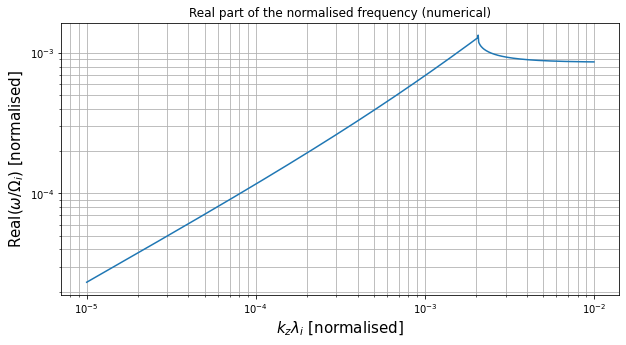

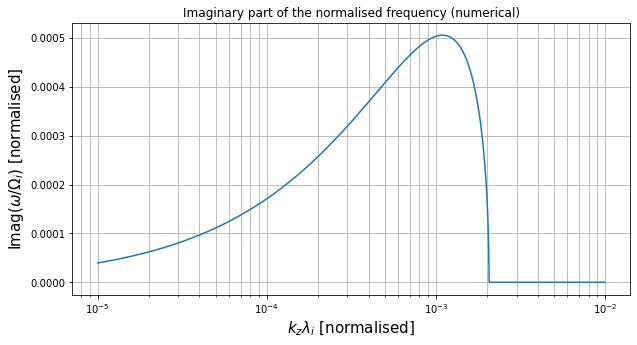

In [4]:
import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda_list, omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda_list, omega_numerical.imag)

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

In [1]:
# dispersion relation for different L_n/lambda_i

# define a function for the dispersion relation
def dispersion_relation(x, k_z_lambda, L_n_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.1 # k_y * lambda_i
    L_T_lambda = 10 # L_T/lambda_i
    temp_ratio = 10 # T_e/T_i
    
    # return the expression for the dispersion relation
    return x**3 + x**2 *k_y_lambda*(L_n_lambda)**(-1) - (7/6)*x*(k_z_lambda)**2 + (k_z_lambda)**2 *k_y_lambda*(L_T_lambda)**(-1)*temp_ratio**(-1) - (1/15)*(k_z_lambda)**2 *(k_y_lambda)*(L_n_lambda)**(-1)

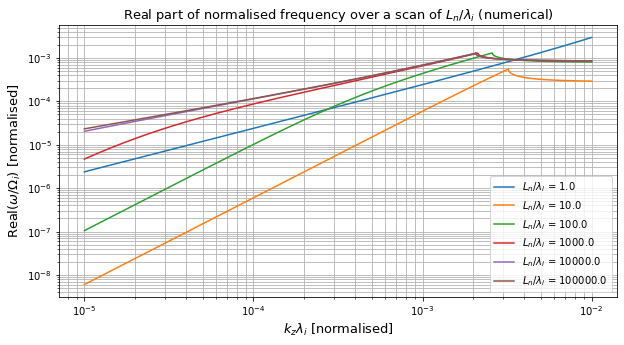

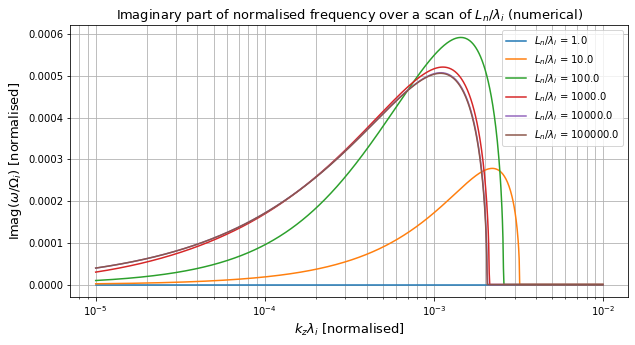

In [3]:
# plot real/imaginary part of frequency for different L_n/lambda_i

# import packages
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# define values for k_z * lambda_i
k_z_lambda = np.logspace(-5, -2, 1000)

# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array
k_z_lambda_list = k_z_lambda.tolist() 

# set different values for L_n/lambda_i
L_n_lambda = np.logspace(0, 5, 6)

# define the plots
fig, ax1 = plt.subplots(figsize=(10,5))
fig, ax2 = plt.subplots(figsize=(10,5))

# run a loop for the different L_n/lambda_i values
for j in L_n_lambda:
    
    omega_numerical = [] # define a list to keep the root
    
    # first loop for the first results
    for i in k_z_lambda_list[:10]:
        # find the root
        solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=(i,j), 
                                        method='secant')
        # save the root
        omega_numerical.append(solution.root)
    
        #print(k_z_lambda_list.index(i))

    # big loop that uses as guesses the previous roots
    for i in k_z_lambda_list[10:1000]:
    
        # add some noise to the roots for the guesses
        guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
        guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
        # calculate root
        solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=(i,j), method='secant')
        # save root
        omega_numerical.append(solution.root)
    
    # turn list back to numpy array -- needed to extract real/imaginary part
    omega_numerical = np.asarray(omega_numerical)
      
    # plot real part of frequency
    ax1.plot(k_z_lambda_list, omega_numerical.real, 
             label = '$L_n/\lambda_i$ = ' + str(j))
    
    # plot imaginary part of frequency
    ax2.plot(k_z_lambda_list, omega_numerical.imag, 
             label = '$L_n/\lambda_i$ = ' + str(j))


# set titles, axes, axes scales etc for the real part
ax1.set_title('Real part of normalised frequency over a scan of $L_n/\lambda_i$ (numerical)', 
              fontsize=13.0)

ax1.set_xlabel('$k_z \lambda_i$ [normalised]', fontsize = 13.0)
ax1.set_ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize = 13.0)
ax1.legend(loc='lower right')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, which="both", ls="-")
  
# set titles, axes, axes scales etc for the imaginary part
ax2.set_title('Imaginary part of normalised frequency over a scan of $L_n/\lambda_i$ (numerical)', 
              fontsize=13.0)

ax2.set_xlabel('$k_z \lambda_i$ [normalised]', fontsize=13.0)
ax2.set_ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=13.0)
ax2.legend(loc='upper right')
ax2.set_xscale('log')
ax2.grid(True, which="both", ls="-")

plt.show()

In [46]:
print(L_n_lambda

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


length of omega_numerical =  850


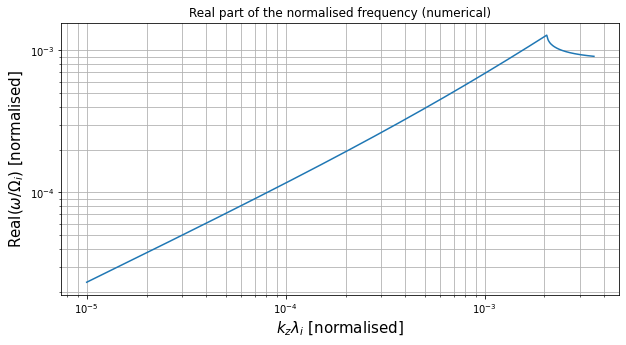

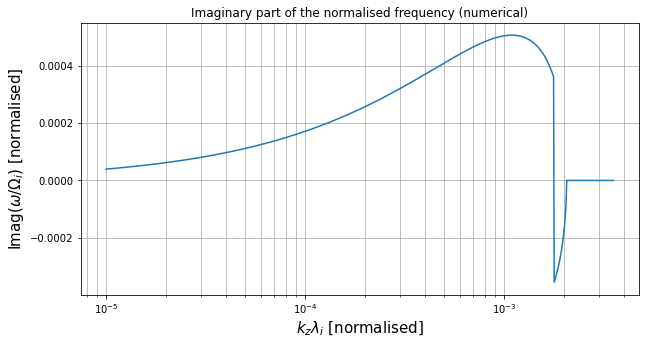

In [75]:
# try to predict negative values for the growth rate

# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# list for the k_z*lambda_i scan
k_z_lambda = np.logspace(-5, -2, 1000)

# turn it to list for the index (easier compared to numpy array)
k_z_lambda_list = k_z_lambda.tolist() 

omega_numerical = [] # list to keep the root

# first loop for the first results
for i in k_z_lambda_list[:10]:
    # find the root
    solution = optimize.root_scalar(dispersion_relation, x0 = 0.0001+0.0001j, 
                                     x1 = 0.001+0.001j, args=i, method='secant')
    # save the root
    omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in k_z_lambda_list[10:750]:
    
    # add some noise to the roots for the guesses
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] + omega_numerical[k_z_lambda_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)    

# loop to find the negative values
for i in k_z_lambda_list[750:850]:

    solution = optimize.root_scalar(dispersion_relation, x0 = 0.00001 - 0.001j, 
                                   x1 = 0.0001 - 0.002j, args=i, method='secant')
    
    omega_numerical.append(solution.root)

"""
for i in k_z_lambda_list[841:850]:
    
    guess_0 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/100
    guess_1 = omega_numerical[k_z_lambda_list.index(i)-1] - omega_numerical[k_z_lambda_list.index(i)-1]/1000
    
    solution = optimize.root_scalar(dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    omega_numerical.append(solution.root)    
"""

print('length of omega_numerical = ', len(omega_numerical))

import matplotlib.pyplot as plt

# turn it into a numpy array again
omega_numerical = np.asarray(omega_numerical)

# plot frequency
plt.subplots(figsize=(10,5))

# plot real part for both roots
plt.plot(k_z_lambda[:850], omega_numerical.real)

# fix the plot label's etc
plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Real part of the normalised frequency (numerical)')
plt.ylabel('Real($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

plt.show()

# plot imaginary part for both roots
plt.subplots(figsize=(10,5))

plt.plot(k_z_lambda[:850], omega_numerical.imag)
#plt.plot(k_z_lambda[839], omega_numerical[839].imag, 'ro')
#plt.plot(k_z_lambda[840], omega_numerical[840].imag, 'ro')

plt.xlabel('$k_z \lambda_i$ [normalised]', fontsize=15.0)
plt.title('Imaginary part of the normalised frequency (numerical)')
plt.ylabel('Imag($\omega / \Omega_i$) [normalised]', fontsize=15.0)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.show()